In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('merged.csv', index_col=0)

In [3]:
data.head()

,MEMBER_ID,ACTIVITY_ID,ACTIVITY_PLAY_ID,ACTIVITY_TIMESTAMP_START,ACTIVITY_TIMESTAMP_END,ACTIVITY_DURATION,TOTAL_TIME_PLAYED_IN_ACTIVITY,SCORE,ADAPTIVE_SCORE,NUMBER_OF_PASSED_ROUNDS,...,ACTIVITYPLAY_OUTCOME,ETL_VERSION,VERSION,ACTIVITY_DIFFICULTY_ID,GAMETYPE_ID,ACTIVITY_RANGE,SERIES_ID,MASTER_ACCOUNT_MEMBER_ID,ACCOUNT_TYPE,BIRTHMONTH_Z_SCORE
0,7157082dab5b9c9b6ca6b00f37b957ddf62ee926,25495,3.131010e+11,2017-05-31T19:36:09Z,2017-05-31T19:39:49Z,220.0,220.0,NaN,5.0,5,...,succeed,0.1.0,1.0.1,6,1,6_10,8,1a3e1d046f3900598496f5ae2115bae2091c478d,1.0,-1.523247
1,7af6c4a8a8507b2436bce4459b3e11cc04f831ef,25495,3.130280e+11,2017-05-31T04:07:47Z,2017-05-31T04:11:59Z,252.0,252.0,NaN,3.0,3,...,succeed,0.1.0,1.0.1,6,1,6_10,8,1de076ee176a208a6d051c0edb87557822eb2b2e,1.0,NaN
2,655b078dd806fa80a841344d35e32e528fc68af9,25484,3.130230e+11,2017-05-31T02:38:06Z,2017-05-31T02:38:10Z,4.0,4.0,NaN,0.0,0,...,cancel,0.1.0,1.0.1,1,1,1_5,7,c68cf3aa7c8e06defe606f332cd8d11c90e86fe4,13.0,0.250486
3,a10e1c4732bbf161593ac47fbf16d7ff810de8fe,25515,3.130160e+11,2017-05-31T01:44:55Z,2017-05-31T01:45:31Z,35.0,35.0,NaN,1.0,1,...,succeed,0.1.0,1.0.1,4,3,6_10,12,dae8b5e9a4d82274da1d420e517cdc031a427781,13.0,NaN
4,82afb1291d95dd5d2ffa5935e9890d8e1748afd3,25511,3.130520e+11,2017-05-31T14:40:25Z,2017-05-31T14:41:14Z,49.0,49.0,NaN,2.0,2,...,succeed,0.1.0,1.0.1,2,3,6_10,12,e49a6df6a596ed50d205d36df93cd6c059aae0fa,1.0,-0.016894


In [4]:
data.shape

(269560, 27)

In [5]:
print('Dataset starts on', data['ACTIVITY_TIMESTAMP_START'].min())
print('Dataset ends on', data['ACTIVITY_TIMESTAMP_START'].max())

Dataset starts on 2017-03-15T18:03:01Z
Dataset ends on 2017-09-30T23:59:33Z


In [6]:
sub = data.sort_values(['MEMBER_ID','ACTIVITY_TIMESTAMP_START']).copy()

In [7]:
life_summary = pd.DataFrame(sub.groupby('MEMBER_ID').first()['ACTIVITY_TIMESTAMP_START'].reset_index(name='FIRST'))
life_summary = life_summary.merge(pd.DataFrame(sub.groupby('MEMBER_ID').last()\
                                 ['ACTIVITY_TIMESTAMP_START'].reset_index(name='LAST')))
life_summary['FIRST'] = pd.to_datetime(life_summary['FIRST']).dt.date
life_summary['LAST'] = pd.to_datetime(life_summary['LAST']).dt.date
life_summary['Duration (days)'] = life_summary['LAST'] - life_summary['FIRST']
life_summary['Duration (days)'] = life_summary['Duration (days)'].dt.days+1
life_summary.head()

,MEMBER_ID,FIRST,LAST,Duration (days)
0,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-20,2017-07-22,3
1,0012b722266d475b27e4e5e3946cb3d28305f7df,2017-07-25,2017-07-25,1
2,0022e0f85f915460168cb98ab552f60cec91450d,2017-05-16,2017-05-16,1
3,00236e6718e23a61a6ae7c7e7bb3244dc4dcb101,2017-07-02,2017-07-02,1
4,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-28,2017-07-29,93


In [8]:
print('Total # of members in the dataset:', life_summary.shape[0])
print('Average member lifetime:', life_summary['Duration (days)'].mean())
print('Median member lifetime:', life_summary['Duration (days)'].median())
print('Average active member(stayed >5 days) lifetime:', 
      life_summary[life_summary['Duration (days)']>5]['Duration (days)'].mean())
print('Median active member(stayed >5 days) lifetime:', 
      life_summary[life_summary['Duration (days)']>5]['Duration (days)'].median())
print('% players quit on the day they started:', 
     life_summary[life_summary['Duration (days)']==1].shape[0]/life_summary.shape[0])
print('% players quit within 5 days since they started:', 
     life_summary[life_summary['Duration (days)']<=5].shape[0]/life_summary.shape[0])
print('')

Total # of members in the dataset: 12696
Average member lifetime: 25.048361688720856
Median member lifetime: 8.0
Average active member(stayed >5 days) lifetime: 45.86704342653183
Median active member(stayed >5 days) lifetime: 37.0
% players quit on the day they started: 0.34365154379332075
% players quit within 5 days since they started: 0.4703843730308759



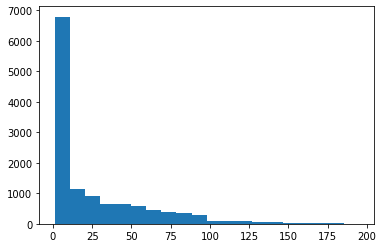

In [9]:
plt.figure()
plt.hist(life_summary['Duration (days)'], bins=20)
plt.show()

In [10]:
sub['START_DAY'] = pd.to_datetime(sub['ACTIVITY_TIMESTAMP_START']).dt.date
sub.head()

,MEMBER_ID,ACTIVITY_ID,ACTIVITY_PLAY_ID,ACTIVITY_TIMESTAMP_START,ACTIVITY_TIMESTAMP_END,ACTIVITY_DURATION,TOTAL_TIME_PLAYED_IN_ACTIVITY,SCORE,ADAPTIVE_SCORE,NUMBER_OF_PASSED_ROUNDS,...,ETL_VERSION,VERSION,ACTIVITY_DIFFICULTY_ID,GAMETYPE_ID,ACTIVITY_RANGE,SERIES_ID,MASTER_ACCOUNT_MEMBER_ID,ACCOUNT_TYPE,BIRTHMONTH_Z_SCORE,START_DAY
84849,00061a613eab2b162e0e25fb59870260ec07cd06,25497,3.184270e+11,2017-07-20T11:44:23Z,2017-07-20T11:44:53Z,30.0,30.0,NaN,0.0,0,...,0.1.0,1.1.0,1,2,6_10,10,363c3ea48f14e05687e7cedfb5888e9fc2eb0701,1.0,0.418837,2017-07-20
83579,00061a613eab2b162e0e25fb59870260ec07cd06,25508,3.184580e+11,2017-07-20T17:01:17Z,2017-07-20T17:02:01Z,44.0,44.0,NaN,6.0,6,...,0.1.0,1.1.0,1,3,1_5,11,363c3ea48f14e05687e7cedfb5888e9fc2eb0701,1.0,0.418837,2017-07-20
83962,00061a613eab2b162e0e25fb59870260ec07cd06,26619,3.184600e+11,2017-07-20T17:19:47Z,2017-07-20T17:23:20Z,213.0,213.0,NaN,2.0,2,...,0.1.0,1.1.0,1,4,6_10,401,363c3ea48f14e05687e7cedfb5888e9fc2eb0701,1.0,0.418837,2017-07-20
84056,00061a613eab2b162e0e25fb59870260ec07cd06,25497,3.184610e+11,2017-07-20T17:24:17Z,2017-07-20T22:40:43Z,162.0,18986.0,NaN,4.0,4,...,0.1.0,1.1.0,1,2,6_10,10,363c3ea48f14e05687e7cedfb5888e9fc2eb0701,1.0,0.418837,2017-07-20
83955,00061a613eab2b162e0e25fb59870260ec07cd06,25496,3.185040e+11,2017-07-20T22:43:48Z,2017-07-20T22:47:05Z,197.0,197.0,NaN,6.0,6,...,0.1.0,1.1.0,1,2,1_5,9,363c3ea48f14e05687e7cedfb5888e9fc2eb0701,1.0,0.418837,2017-07-20


In [11]:
version = sub.groupby('VERSION').first()['START_DAY'].reset_index(name='DATE')
version_count = sub['VERSION'].value_counts().reset_index()
version_count.columns = ['VERSION','COUNT']
version = version.merge(version_count)
version_major = version[version['COUNT']>500]
version_major

,VERSION,DATE,COUNT
0,1.0.0,2017-04-06,14248
1,1.0.1,2017-05-16,63888
3,1.1.0,2017-07-20,96418
14,1.2.0,2017-08-04,41618
18,1.2.1,2017-09-05,32806
22,1.3.0,2017-09-17,1992
30,1.3.1,2017-09-29,17820


In [12]:
summary = pd.DataFrame(sub.groupby('START_DAY').nunique()['MEMBER_ID'].reset_index(name='DAU'))
summary.columns = ['DATE','DAU']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


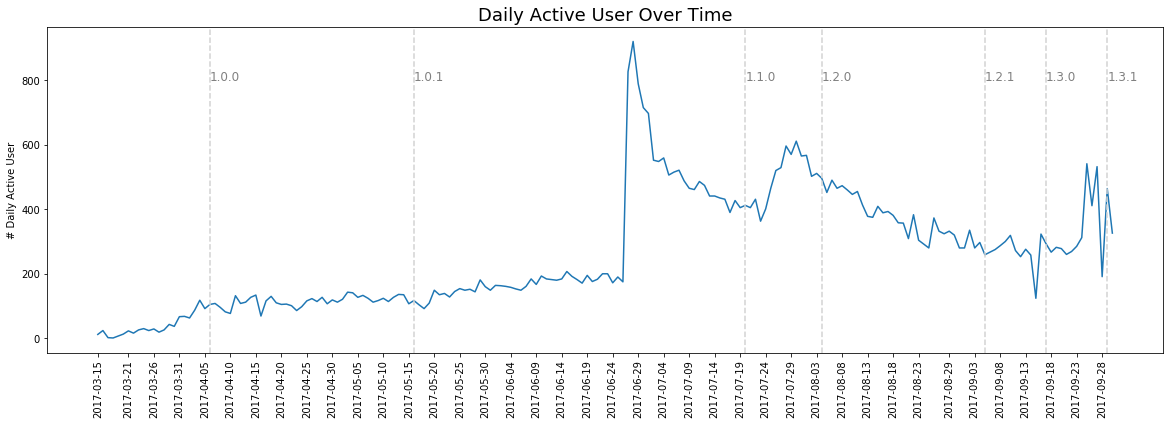

In [13]:
plt.figure(figsize=(20,6))
plt.plot(summary['DATE'],summary['DAU'])
plt.xticks(summary['DATE'][::5], rotation=90)
for i in version_major.index:
    plt.axvline(version_major.loc[i,'DATE'],linestyle='--',color='lightgrey')
    plt.annotate(version_major.loc[i,'VERSION'],
                 (version_major.loc[i,'DATE'],800),
                fontsize=12,color='grey')
plt.title('Daily Active User Over Time', fontsize=18)
plt.ylabel('# Daily Active User')
plt.show()

In [14]:
summary[(pd.to_datetime(summary['DATE'])>'2017-06-24') & (pd.to_datetime(summary['DATE'])<'2017-06-29')]

,DATE,DAU
101,2017-06-25,190
102,2017-06-26,175
103,2017-06-27,826
104,2017-06-28,920


In [15]:
print('Daily Active User in September 2017 (last month in the dataset):',
      summary[pd.to_datetime(summary['DATE'])>'2017-08-31']['DAU'].mean())

Daily Active User in September 2017 (last month in the dataset): 303.8666666666667


In [16]:
daily_session = pd.DataFrame(sub['START_DAY'].value_counts().reset_index())
daily_session.columns = ['DATE', 'DAILY_SESSION']
summary = summary.merge(daily_session)
summary.head()

,DATE,DAU,DAILY_SESSION
0,2017-03-15,12,59
1,2017-03-16,24,129
2,2017-03-17,2,26
3,2017-03-18,1,7
4,2017-03-20,13,37


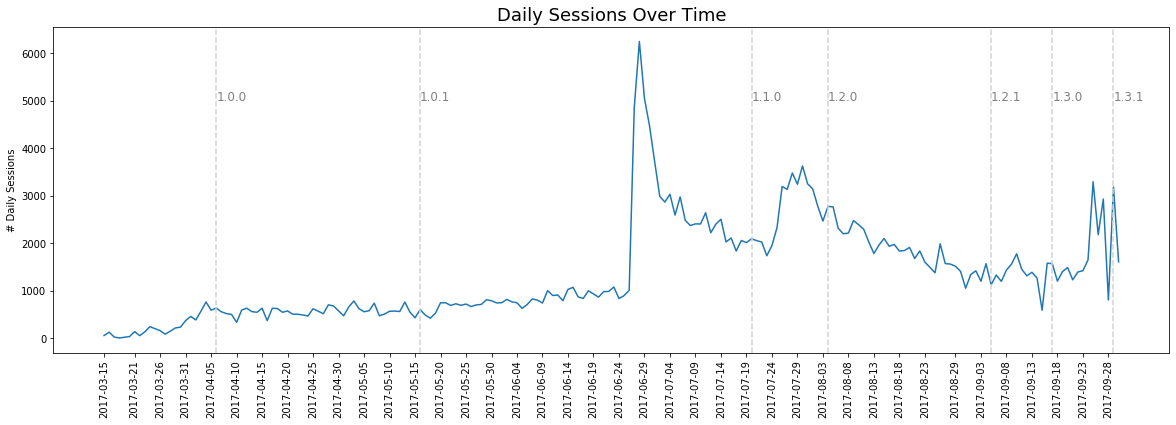

In [17]:
plt.figure(figsize=(20,6))
plt.plot(summary['DATE'],summary['DAILY_SESSION'])
plt.xticks(summary['DATE'][::5], rotation=90)
for i in version_major.index:
    plt.axvline(version_major.loc[i,'DATE'],linestyle='--',color='lightgrey')
    plt.annotate(version_major.loc[i,'VERSION'],
                 (version_major.loc[i,'DATE'],5000),
                fontsize=12,color='grey')
plt.title('Daily Sessions Over Time', fontsize=18)
plt.ylabel('# Daily Sessions')
plt.show()

In [86]:
summary[pd.to_datetime(summary['DATE'])>pd.to_datetime('2017-06-25')][['DATE','DAU']].head(10)

,DATE,DAU
102,2017-06-26,175
103,2017-06-27,826
104,2017-06-28,920
105,2017-06-29,789
106,2017-06-30,715
107,2017-07-01,697
108,2017-07-02,552
109,2017-07-03,548
110,2017-07-04,559
111,2017-07-05,506


In [18]:
summary['AVG_SESSION_PER_PLAYER'] = summary['DAILY_SESSION']/summary['DAU']

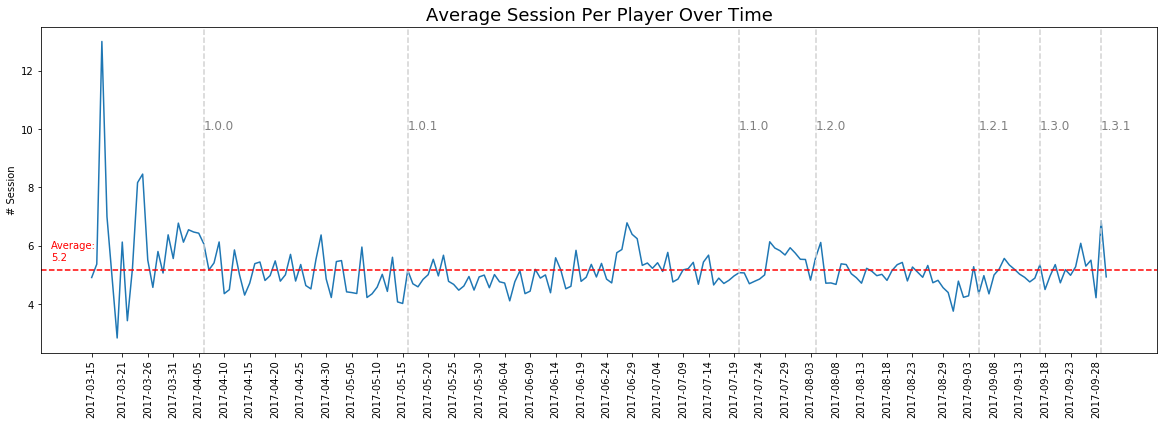

In [19]:
plt.figure(figsize=(20,6))
plt.plot(summary['DATE'],summary['AVG_SESSION_PER_PLAYER'])
plt.xticks(summary['DATE'][::5], rotation=90)
for i in version_major.index:
    plt.axvline(version_major.loc[i,'DATE'],linestyle='--',color='lightgrey')
    plt.annotate(version_major.loc[i,'VERSION'],
                 (version_major.loc[i,'DATE'],10),
                fontsize=12,color='grey')
plt.axhline(summary['AVG_SESSION_PER_PLAYER'].mean(),
            color='red', linestyle='--')
plt.annotate('Average:\n{}'.format(round(summary['AVG_SESSION_PER_PLAYER'].mean(),1)), 
             ('2017-03-07', 5.5), color='red')
plt.title('Average Session Per Player Over Time', fontsize=18)
plt.ylabel('# Session')
plt.show()

In [20]:
session_duration = pd.DataFrame(sub.groupby('START_DAY').mean()['ACTIVITY_DURATION'].reset_index())
session_duration.columns = ['DATE','SESSION_DURATION']
summary = summary.merge(session_duration)
summary.head()

,DATE,DAU,DAILY_SESSION,AVG_SESSION_PER_PLAYER,SESSION_DURATION
0,2017-03-15,12,59,4.916667,297.135593
1,2017-03-16,24,129,5.375000,121.240310
2,2017-03-17,2,26,13.000000,148.307692
3,2017-03-18,1,7,7.000000,107.285714
4,2017-03-20,13,37,2.846154,110.108108


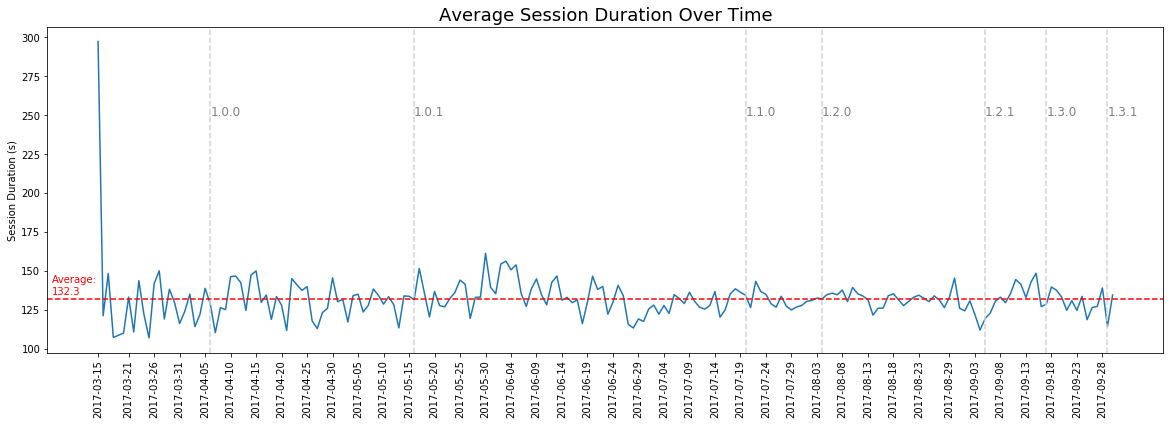

In [21]:
plt.figure(figsize=(20,6))
plt.plot(summary['DATE'],summary['SESSION_DURATION'])
plt.xticks(summary['DATE'][::5], rotation=90)
for i in version_major.index:
    plt.axvline(version_major.loc[i,'DATE'],linestyle='--',color='lightgrey')
    plt.annotate(version_major.loc[i,'VERSION'],
                 (version_major.loc[i,'DATE'],250),
                fontsize=12,color='grey')
plt.axhline(summary['SESSION_DURATION'].mean(),
            color='red', linestyle='--')
plt.annotate('Average:\n{}'.format(round(summary['SESSION_DURATION'].mean(),1)), 
             ('2017-03-06', 135), color='red')
plt.title('Average Session Duration Over Time', fontsize=18)
plt.ylabel('Session Duration (s)')
plt.show()

In [22]:
sub['COMPLETION_RATE'] = sub['NUMBER_OF_ROUNDS_COMPLETED'] / sub['NUMBER_OF_ROUNDS_STARTED']
sub['PASS_RATE'] = sub['NUMBER_OF_PASSED_ROUNDS'] / sub['NUMBER_OF_ROUNDS_COMPLETED']
sub[['COMPLETION_RATE','PASS_RATE']] = sub[['COMPLETION_RATE','PASS_RATE']].fillna(0)

In [23]:
pass_rate = pd.DataFrame(sub.groupby('START_DAY').mean()['PASS_RATE'].reset_index())
pass_rate.columns = ['DATE','PASS_RATE']
summary = summary.merge(pass_rate)
completion_rate = pd.DataFrame(sub.groupby('START_DAY').mean()['COMPLETION_RATE'].reset_index())
completion_rate.columns = ['DATE','COMPLETION_RATE']
summary = summary.merge(completion_rate)
summary.head()

,DATE,DAU,DAILY_SESSION,AVG_SESSION_PER_PLAYER,SESSION_DURATION,PASS_RATE,COMPLETION_RATE
0,2017-03-15,12,59,4.916667,297.135593,0.830508,0.888418
1,2017-03-16,24,129,5.375000,121.240310,0.743023,0.837339
2,2017-03-17,2,26,13.000000,148.307692,0.884615,0.961538
3,2017-03-18,1,7,7.000000,107.285714,1.000000,1.000000
4,2017-03-20,13,37,2.846154,110.108108,0.747748,0.841441


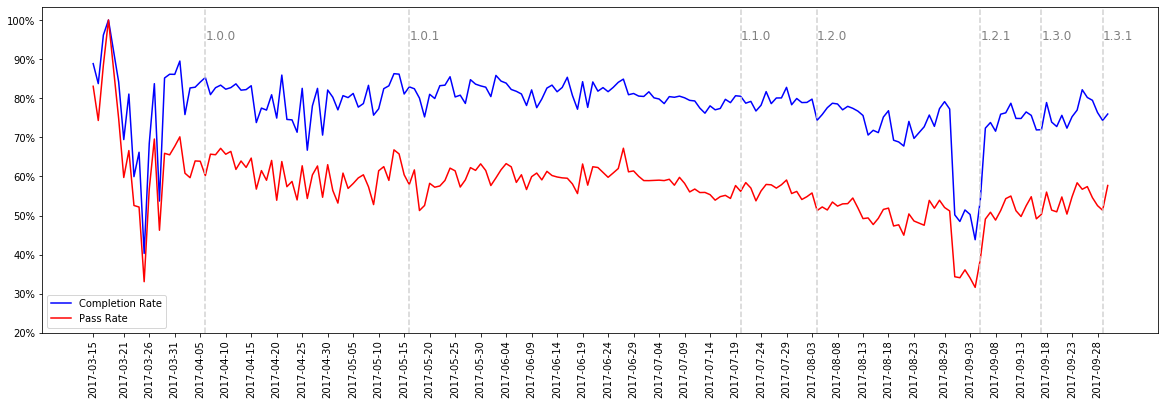

In [63]:
plt.figure(figsize=(20,6))
plt.plot(summary['DATE'],summary['COMPLETION_RATE'],color='blue',label='Completion Rate')
plt.plot(summary['DATE'],summary['PASS_RATE'],color='red',label='Pass Rate')
plt.xticks(summary['DATE'][::5], rotation=90)
for i in version_major.index:
    plt.axvline(version_major.loc[i,'DATE'],linestyle='--',color='lightgrey')
    plt.annotate(version_major.loc[i,'VERSION'],
                 (version_major.loc[i,'DATE'],0.95),
                fontsize=12,color='grey')
plt.yticks(np.arange(0.2,1.1,0.1), [str(int(i*100))+'%' for i in np.arange(0.2,1.1,0.1)])
#plt.title('Completion and Pass Rate Over Time', fontsize=18)
plt.legend()
plt.show()

In [25]:
history = sub.groupby(['MEMBER_ID','START_DAY']).count()['ACTIVITY_DURATION'].reset_index(name='#_SESSIONS')
history['TIME_BTW_SS'] = history.groupby('MEMBER_ID')['START_DAY'].transform(lambda x: x.diff())
history.loc[history['TIME_BTW_SS'].notnull(),'TIME_BTW_SS'] = (history[history['TIME_BTW_SS'].notnull()]['TIME_BTW_SS'].\
                                              astype('timedelta64[D]').dt.days)
history['TIME_BTW_SS'] = history['TIME_BTW_SS'].fillna(0)
history['DAY'] = history.groupby('MEMBER_ID')['TIME_BTW_SS'].transform(lambda x: x.cumsum())+1
history.head()

,MEMBER_ID,START_DAY,#_SESSIONS,TIME_BTW_SS,DAY
0,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-20,8,0,1
1,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-22,2,2,3
2,0012b722266d475b27e4e5e3946cb3d28305f7df,2017-07-25,4,0,1
3,0022e0f85f915460168cb98ab552f60cec91450d,2017-05-16,4,0,1
4,00236e6718e23a61a6ae7c7e7bb3244dc4dcb101,2017-07-02,19,0,1


In [26]:
print('Average # of sessions played per active day:', history['#_SESSIONS'].mean())
print('Average days between sessions (1 means played consecutively):', 
      history[history['TIME_BTW_SS']!=0]['TIME_BTW_SS'].mean())
print('Median days between sessions (1 means played consecutively):', 
      history[history['TIME_BTW_SS']!=0]['TIME_BTW_SS'].median())
print('75% days between sessions (1 means played consecutively):', 
      history[history['TIME_BTW_SS']!=0]['TIME_BTW_SS'].quantile(0.75))
print('Maximum days between sessions:', history['TIME_BTW_SS'].max())

Average # of sessions played per active day: 5.212212618674711
Average days between sessions (1 means played consecutively): 7.824453499397761
Median days between sessions (1 means played consecutively): 3.0
75% days between sessions (1 means played consecutively): 8.0
Maximum days between sessions: 183


In [27]:
history['LIFETIME'] = history.groupby('MEMBER_ID')['DAY'].transform(lambda x: x.max())
history['DAY_TO_QUIT'] = history['DAY']- history['LIFETIME']
history.head(10)

,MEMBER_ID,START_DAY,#_SESSIONS,TIME_BTW_SS,DAY,LIFETIME,DAY_TO_QUIT
0,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-20,8,0,1,3,-2
1,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-22,2,2,3,3,0
2,0012b722266d475b27e4e5e3946cb3d28305f7df,2017-07-25,4,0,1,1,0
3,0022e0f85f915460168cb98ab552f60cec91450d,2017-05-16,4,0,1,1,0
4,00236e6718e23a61a6ae7c7e7bb3244dc4dcb101,2017-07-02,19,0,1,1,0
5,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-28,10,0,1,93,-92
6,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-29,5,1,2,93,-91
7,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-30,3,1,3,93,-90
8,002576a985c4614e1e7d918d4985b331d3093d34,2017-05-14,5,14,17,93,-76
9,002576a985c4614e1e7d918d4985b331d3093d34,2017-05-18,2,4,21,93,-72


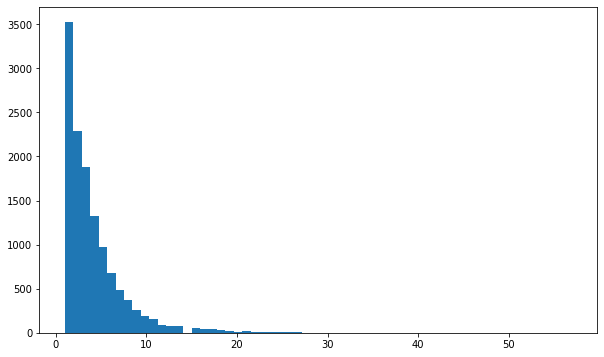

In [28]:
plt.figure(figsize=(10,6))
plt.hist(history[history['DAY_TO_QUIT']==0]['#_SESSIONS'],bins=60)
plt.show()

In [29]:
stayed = life_summary[life_summary['Duration (days)']>5].sort_values('Duration (days)').reset_index()
stayed = stayed.drop(columns='index')
max_duration = stayed['Duration (days)'].max()
colors = plt.get_cmap('binary')(stayed['Duration (days)']/max_duration*0.4+0.1)

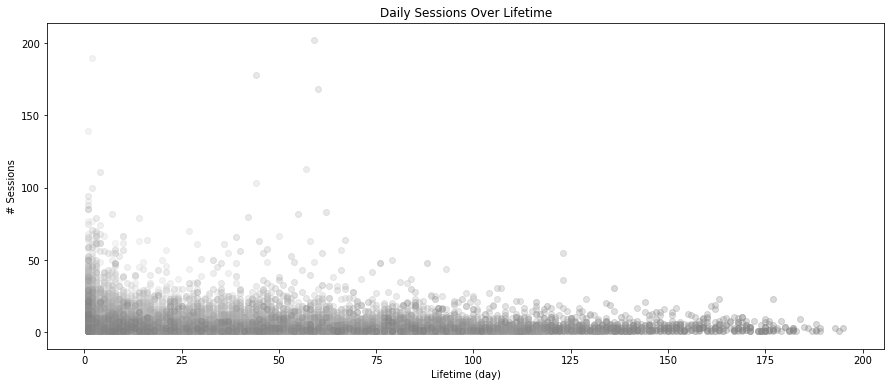

In [30]:
plt.figure(figsize=(15,6))
for member in stayed['MEMBER_ID']:
    df = history[history['MEMBER_ID']==member]
    i = stayed[stayed['MEMBER_ID']==member].index
    plt.scatter(df['DAY'],df['#_SESSIONS'],
                color=colors[i], alpha=0.3)
plt.title('Daily Sessions Over Lifetime')
plt.xlabel('Lifetime (day)')
plt.ylabel('# Sessions')
plt.show()

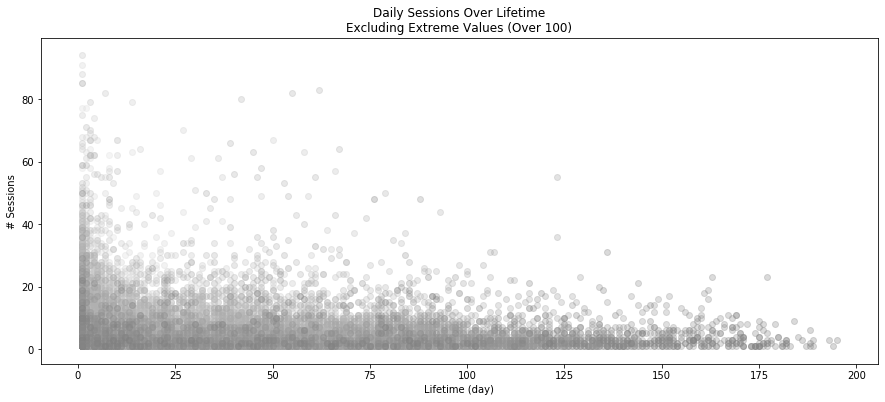

In [31]:
plt.figure(figsize=(15,6))
for member in stayed['MEMBER_ID']:
    df = history[(history['MEMBER_ID']==member) & (history['#_SESSIONS']<100)]
    i = stayed[stayed['MEMBER_ID']==member].index
    plt.scatter(df['DAY'],df['#_SESSIONS'],
                color=colors[i], alpha=0.3)
plt.title('Daily Sessions Over Lifetime\nExcluding Extreme Values (Over 100)')
plt.xlabel('Lifetime (day)')
plt.ylabel('# Sessions')
plt.show()

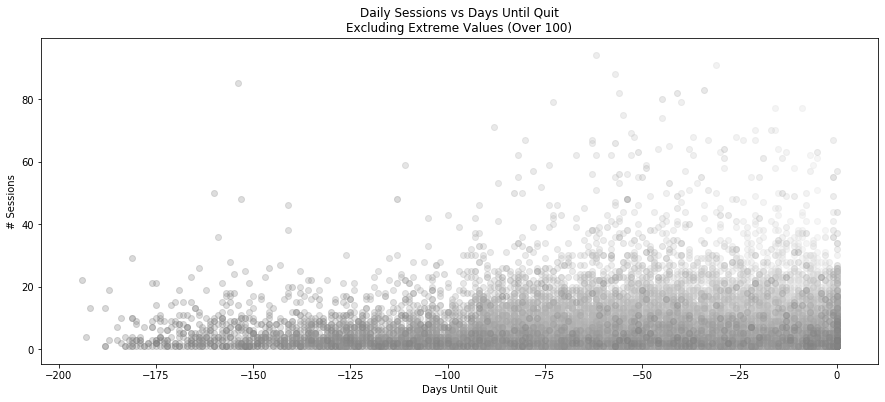

In [32]:
plt.figure(figsize=(15,6))
for member in stayed['MEMBER_ID']:
    df = history[(history['MEMBER_ID']==member) & (history['#_SESSIONS']<100)]
    i = stayed[stayed['MEMBER_ID']==member].index
    plt.scatter(df['DAY_TO_QUIT'],df['#_SESSIONS'],
                color=colors[i], alpha=0.3)
plt.title('Daily Sessions vs Days Until Quit\nExcluding Extreme Values (Over 100)')
plt.xlabel('Days Until Quit')
plt.ylabel('# Sessions')
plt.show()

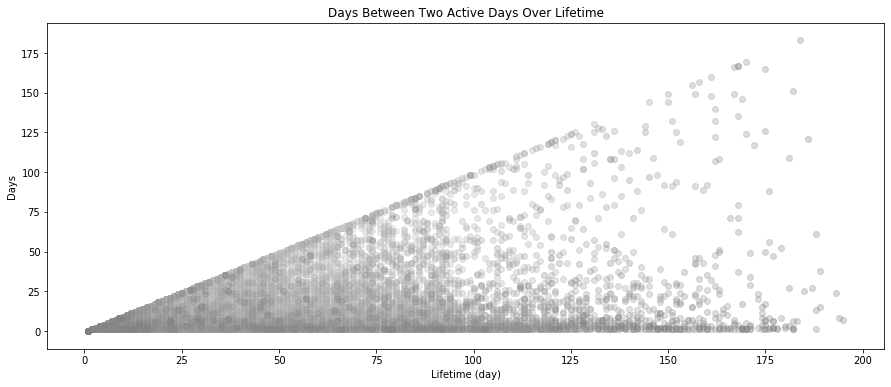

In [33]:
plt.figure(figsize=(15,6))
for member in stayed['MEMBER_ID']:
    df = history[history['MEMBER_ID']==member]
    i = stayed[stayed['MEMBER_ID']==member].index
    plt.scatter(df['DAY'],df['TIME_BTW_SS'],
                color=colors[i], alpha=0.3)
plt.title('Days Between Two Active Days Over Lifetime')
plt.xlabel('Lifetime (day)')
plt.ylabel('Days')
plt.show()

In [57]:
history1 = history[history['TIME_BTW_SS']!=0].copy()
history1['TIME_BTW_SS'] = history1['TIME_BTW_SS'] - 1
history1.head()

,MEMBER_ID,START_DAY,#_SESSIONS,TIME_BTW_SS,DAY,LIFETIME,DAY_TO_QUIT
1,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-22,2,1,3,3,0
6,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-29,5,0,2,93,-91
7,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-30,3,0,3,93,-90
8,002576a985c4614e1e7d918d4985b331d3093d34,2017-05-14,5,13,17,93,-76
9,002576a985c4614e1e7d918d4985b331d3093d34,2017-05-18,2,3,21,93,-72


In [58]:
history1['TIME_BTW_SS'].describe()

count    39021.000000
mean         6.824453
std         13.159875
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max        182.000000
Name: TIME_BTW_SS, dtype: float64

In [68]:
print('% Users Returned After 15 Days Absence:', history1[history1['TIME_BTW_SS']>15]['MEMBER_ID'].nunique()/history1['MEMBER_ID'].nunique())
print('% Users Returned After 30 Days Absence:', history1[history1['TIME_BTW_SS']>30]['MEMBER_ID'].nunique()/history1['MEMBER_ID'].nunique())

% Users Returned After 15 Days Absence: 0.46957878315132606
% Users Returned After 30 Days Absence: 0.2169686787471499


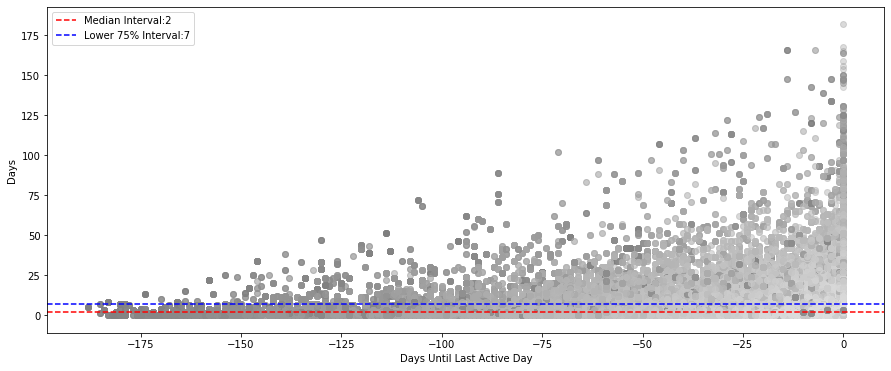

In [62]:
plt.figure(figsize=(15,6))
for member in history1['MEMBER_ID']:
    df = history1[history1['MEMBER_ID']==member]
    i = stayed[stayed['MEMBER_ID']==member].index
    plt.scatter(df['DAY_TO_QUIT'],df['TIME_BTW_SS'],
                color=colors[i], alpha=0.3)
#plt.title('Days Between Two Active Days vs Days Until Quit')
plt.xlabel('Days Until Last Active Day')
plt.ylabel('Days')
plt.axhline(history1['TIME_BTW_SS'].median(),
           color='red', linestyle='--',
           label='Median Interval:{}'.\
                 format(int(history1['TIME_BTW_SS'].median())))
plt.axhline(history1['TIME_BTW_SS'].quantile(0.75),
           color='blue', linestyle='--',
           label='Lower 75% Interval:{}'.\
                 format(int(history1['TIME_BTW_SS'].quantile(0.75))))
plt.legend()
plt.show()

In [35]:
life_summary.shape

(12696, 4)

In [36]:
life_summary.head()

,MEMBER_ID,FIRST,LAST,Duration (days)
0,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-20,2017-07-22,3
1,0012b722266d475b27e4e5e3946cb3d28305f7df,2017-07-25,2017-07-25,1
2,0022e0f85f915460168cb98ab552f60cec91450d,2017-05-16,2017-05-16,1
3,00236e6718e23a61a6ae7c7e7bb3244dc4dcb101,2017-07-02,2017-07-02,1
4,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-28,2017-07-29,93


In [37]:
life_summary = life_summary.merge(sub.groupby('MEMBER_ID').first()['BIRTHMONTH_Z_SCORE'].reset_index())

In [38]:
life_summary['BIRTHMONTH_Z_SCORE'].describe()

count    11012.000000
mean        -0.009196
std          0.991566
min        -20.747122
25%         -0.385505
50%          0.084336
75%          0.553077
max          2.126550
Name: BIRTHMONTH_Z_SCORE, dtype: float64

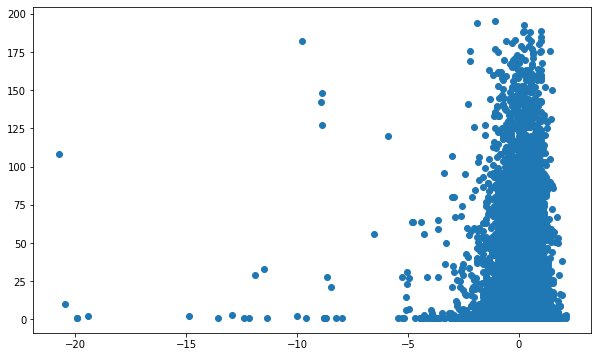

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(life_summary['BIRTHMONTH_Z_SCORE'],life_summary['Duration (days)'])
plt.show()

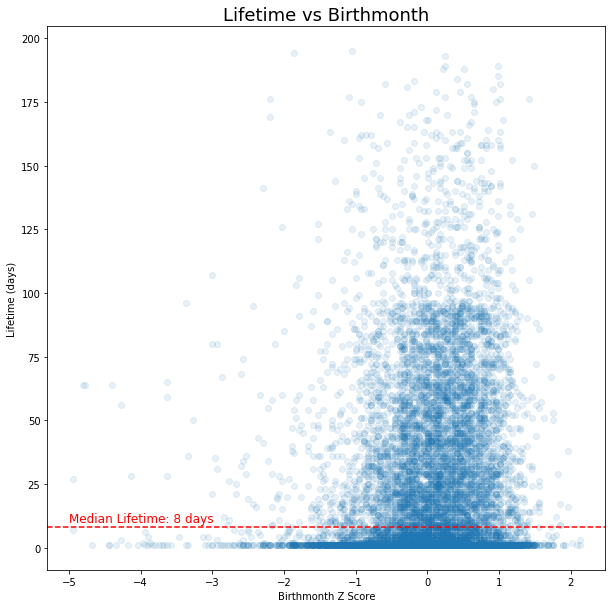

In [40]:
df = life_summary[life_summary['BIRTHMONTH_Z_SCORE']>-5]
plt.figure(figsize=(10,10))
plt.scatter(df['BIRTHMONTH_Z_SCORE'],df['Duration (days)'],alpha=0.1)
plt.axhline(8, color='red', linestyle='--')
plt.annotate('Median Lifetime: 8 days', (-5,10), fontsize=12, color='red')
plt.xlabel('Birthmonth Z Score')
plt.ylabel('Lifetime (days)')
plt.title('Lifetime vs Birthmonth', fontsize=18)
plt.show()

In [41]:
life_summary = life_summary.merge(sub.groupby('MEMBER_ID').last()['ACTIVITY_DIFFICULTY_ID'].\
                                  reset_index(name='CHURN_ON_DIFFICULTY'))
life_summary = life_summary.merge(sub.groupby('MEMBER_ID').last()['GAMETYPE_ID'].\
                                  reset_index(name='CHURN_ON_GAMETYPE'))
life_summary = life_summary.merge(sub.groupby('MEMBER_ID').last()['SERIES_ID'].\
                                  reset_index(name='CHURN_ON_SERIES'))
life_summary = life_summary.merge(sub.groupby('MEMBER_ID').last()['ACTIVITY_RANGE'].\
                                  reset_index(name='CHURN_ON_ACTIVITY_RANGE'))

In [42]:
life_summary.head()

,MEMBER_ID,FIRST,LAST,Duration (days),BIRTHMONTH_Z_SCORE,CHURN_ON_DIFFICULTY,CHURN_ON_GAMETYPE,CHURN_ON_SERIES,CHURN_ON_ACTIVITY_RANGE
0,00061a613eab2b162e0e25fb59870260ec07cd06,2017-07-20,2017-07-22,3,0.418837,2,2,10,6_10
1,0012b722266d475b27e4e5e3946cb3d28305f7df,2017-07-25,2017-07-25,1,1.019617,6,3,11,1_5
2,0022e0f85f915460168cb98ab552f60cec91450d,2017-05-16,2017-05-16,1,-0.251264,1,1,7,1_5
3,00236e6718e23a61a6ae7c7e7bb3244dc4dcb101,2017-07-02,2017-07-02,1,0.283496,4,3,11,1_5
4,002576a985c4614e1e7d918d4985b331d3093d34,2017-04-28,2017-07-29,93,1.187968,3,1,7,1_5


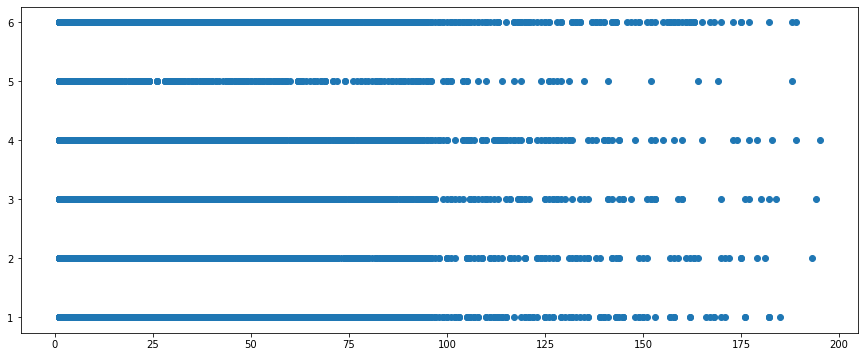

In [43]:
plt.figure(figsize=(15,6))
plt.scatter(life_summary['Duration (days)'], life_summary['CHURN_ON_DIFFICULTY'])
plt.show()

In [44]:
life_summary['CHURN_ON_DIFFICULTY'].value_counts()/life_summary.shape[0]

1    0.452977
6    0.190848
2    0.115312
4    0.106727
3    0.096093
5    0.038043
Name: CHURN_ON_DIFFICULTY, dtype: float64

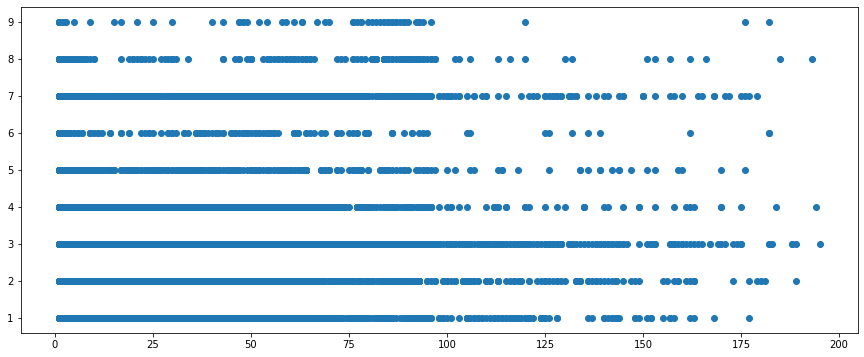

In [45]:
plt.figure(figsize=(15,6))
plt.scatter(life_summary['Duration (days)'], life_summary['CHURN_ON_GAMETYPE'])
plt.show()

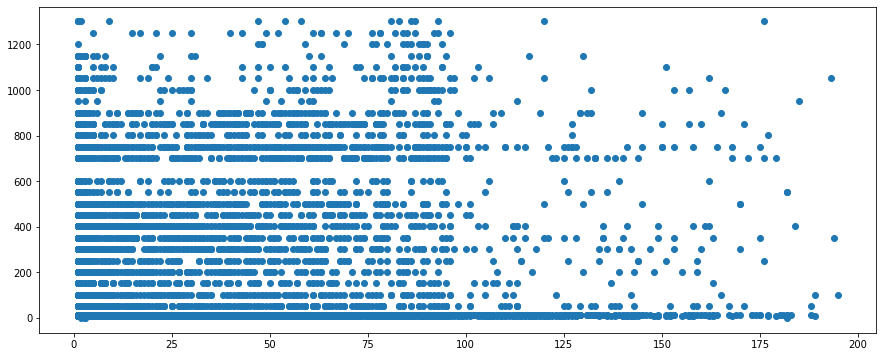

In [46]:
plt.figure(figsize=(15,6))
plt.scatter(life_summary['Duration (days)'], life_summary['CHURN_ON_SERIES'])
plt.show()

In [47]:
life_summary[['MEMBER_ID','Duration (days)']].to_csv('lifetime.csv', index=False)

In [48]:
history[history['TIME_BTW_SS']>30]['MEMBER_ID'].nunique()

1895

In [49]:
history['MEMBER_ID'].nunique()

12696

In [50]:
sub['IDLE%'] = 1 - sub['ACTIVITY_DURATION']/sub['TOTAL_TIME_PLAYED_IN_ACTIVITY']

In [51]:
sub['IDLE%'].describe()

count    269560.000000
mean          0.033782
std           0.135518
min          -0.095808
25%           0.000000
50%           0.000000
75%           0.000000
max           0.999929
Name: IDLE%, dtype: float64

In [52]:
sub['VERSION'].value_counts()

1.1.0        96418
1.0.1        63888
1.2.0        41618
1.2.1        32806
1.3.1        17820
1.0.0        14248
1.3.0         1992
1.2.0.4        153
1.2.0.2        111
1.1.0.4         88
1.3.0.4         81
1.1.0.2         73
1.1.0.8         67
1.3.0.3         37
1.2.0.5         34
1.3.1.1         26
1.1.0.14        24
1.2.1.2         24
1.1.0.6         11
1.1.0.9          7
1.3.0.151        6
1.3.0.166        4
1.3              4
1.0.2            4
1.1.0.5          3
1.3.0.1          3
1.4.0.15         3
1.1.0.11         2
1.1.0.10         1
1.1.0.3          1
1.3.0.5          1
1.3.0.2          1
1.2.1.7          1
Name: VERSION, dtype: int64

In [53]:
sub['VERSION*'] = sub['VERSION']

sub['VERSION*'] = sub['VERSION*'].str.replace('1.0.2', '1.0.1')

sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.2', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.3', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.4', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.5', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.6', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.8', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.9', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.10', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.11', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.14', '1.1.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.1.0.1', '1.1.0')

sub['VERSION*'] = sub['VERSION*'].str.replace('1.2.0.4', '1.2.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.2.0.2', '1.2.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.2.0.5', '1.2.0')

sub['VERSION*'] = sub['VERSION*'].str.replace('1.2.1.2', '1.2.1')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.2.1.7', '1.2.1')

sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.0.1', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.0.2', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.0.3', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.0.4', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.0.5', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.051', '1.3.0')
sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.066', '1.3.0')
sub.loc[sub['VERSION*']=='1.3','VERSION*'] = '1.3.0'

sub['VERSION*'] = sub['VERSION*'].str.replace('1.3.1.1', '1.3.1')

sub['VERSION*'] = sub['VERSION*'].str.replace('1.4.0.15', '1.3.1')

sub['VERSION*'].value_counts()

1.1.0    96695
1.0.1    63892
1.2.0    41916
1.2.1    32831
1.3.1    17849
1.0.0    14248
1.3.0     2129
Name: VERSION*, dtype: int64

In [71]:
history['#_SESSIONS'].describe()

count    51717.000000
mean         5.212213
std          6.145036
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        202.000000
Name: #_SESSIONS, dtype: float64

In [77]:
history[history['#_SESSIONS']<=3].shape[0]/history.shape[0]

0.513428853181739

In [72]:
history['MEMBER_ID'].nunique()

12696

In [75]:
sub['ACTIVITY_DURATION'].describe()

count    269560.000000
mean        129.951157
std         151.201069
min           1.000000
25%          41.000000
50%         100.000000
75%         168.000000
max        2998.000000
Name: ACTIVITY_DURATION, dtype: float64

In [76]:
sub[sub['ACTIVITY_DURATION']==2998]

,MEMBER_ID,ACTIVITY_ID,ACTIVITY_PLAY_ID,ACTIVITY_TIMESTAMP_START,ACTIVITY_TIMESTAMP_END,ACTIVITY_DURATION,TOTAL_TIME_PLAYED_IN_ACTIVITY,SCORE,ADAPTIVE_SCORE,NUMBER_OF_PASSED_ROUNDS,...,ACTIVITY_RANGE,SERIES_ID,MASTER_ACCOUNT_MEMBER_ID,ACCOUNT_TYPE,BIRTHMONTH_Z_SCORE,START_DAY,COMPLETION_RATE,PASS_RATE,IDLE%,VERSION*
36223,dac2aca447ccc29e9772d0efdf8207da9bbd5d92,25507,3.122870e+11,2017-05-24T19:54:53Z,2017-05-24T20:45:03Z,2998.0,3010.0,NaN,2.0,2,...,6_10,10,ff3d3b62f64a89122ec5801cf84a9fd9c501b7db,1.0,0.185567,2017-05-24,0.8,0.5,0.003987,1.0.1


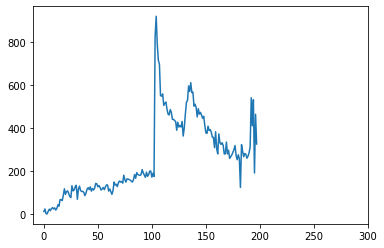

In [109]:
plt.figure()
plt.plot(summary['DAU'])
plt.xlim(-10,300)
plt.show()